1-4. Import the required packages with their customary aliases.

Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time.

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [210]:
#skipping footernotes as we will remove the columns for it later anyway
gdp_df = pd.read_csv('../data/gdp_percapita.csv', skipfooter= 2, engine='python')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [211]:
#Row 4675 had errors.  Skipped footer notes
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines= False, skipfooter = 181 )
internet_df.head(6)

C:\Users\diego\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each dataframe - how many rows, how many columns.

In [212]:
print(gdp_df.shape)
print(internet_df.shape)

(6729, 4)
(4495, 4)


8. Take a look at the data types for the columns in each table.

In [213]:
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


9. Take a look at the last 10 rows of each dataset in turn.

In [214]:
print(gdp_df.tail(10))
print(internet_df.tail(10))

     Country or Area  Year        Value  Value Footnotes
6719        Zimbabwe  1999  3054.064189              NaN
6720        Zimbabwe  1998  3099.076182              NaN
6721        Zimbabwe  1997  3036.422224              NaN
6722        Zimbabwe  1996  2985.856605              NaN
6723        Zimbabwe  1995  2736.486436              NaN
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN
     Country or Area  Year     Value  Value Footnotes
4485        Zimbabwe  2002  3.994356              NaN
4486        Zimbabwe  2001  0.799846              NaN
4487        Zimbabwe  2000  0.401434              NaN
4488        Zimbabwe  1999  0.161676              NaN
4489        Zimbabwe  1998  0.081648              NaN
4490        Zimbabwe  1997  0.033080             

10. Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.

In [215]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
internet_df = internet_df.drop(columns = ['Value Footnotes'])
print(gdp_df.head())

  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834


11. Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [216]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


12. Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [217]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [218]:
gdp_and_internet_use = gdp_df.merge(internet_df,
                                    how = 'outer')

14. Look at the first five rows of your new data frame to confirm it merged correctly.

In [219]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


15. Look at the last five rows to make sure the data is clean and as expected.

In [220]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


16. Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [221]:
subset_04_09_14 = gdp_and_internet_use.query('Year == (2004,2009,2014)')

subset_04_09_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000


17. Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [222]:
gdp_int_04 = subset_04_09_14.query('Year == 2004')
gdp_int_09 = subset_04_09_14.query('Year == 2009')
gdp_int_14 = subset_04_09_14.query('Year == 2014')

18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options). Iceland, with 98.16.

In [223]:
#gdp_int_14.dtypes
print(gdp_int_14.sort_values('Internet_Users_Pct', ascending = False))
#gdp_int_14.head()


                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
2581              Iceland  2014    42774.888849               98.16
6772              Bermuda  2014             NaN               96.80
4530               Norway  2014    63328.259526               96.30
1404              Denmark  2014    45057.083449               95.99
6732              Andorra  2014             NaN               95.90
...                   ...   ...             ...                 ...
6245               Tuvalu  2014     3141.056160                 NaN
6418  Upper middle income  2014    14770.977043                 NaN
6563              Vietnam  2014     5312.492183                 NaN
6592   West Bank and Gaza  2014     4445.307470                 NaN
6617                World  2014    14514.392218                 NaN

[278 rows x 4 columns]


19. Which country had the lowest percentage of internet users in 2014? What was the percentage? Dem People's Rep of Korea, with 0 %.

In [224]:
print(gdp_int_14.sort_values('Internet_Users_Pct'))

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6940  Dem. People's Rep. of Korea  2014             NaN                0.00
6999                      Eritrea  2014             NaN                0.99
6044                  Timor-Leste  2014     6466.737732                1.14
794                       Burundi  2014      768.469837                1.38
7521                      Somalia  2014             NaN                1.63
...                           ...   ...             ...                 ...
6245                       Tuvalu  2014     3141.056160                 NaN
6418          Upper middle income  2014    14770.977043                 NaN
6563                      Vietnam  2014     5312.492183                 NaN
6592           West Bank and Gaza  2014     4445.307470                 NaN
6617                        World  2014    14514.392218                 NaN

[278 rows x 4 columns]


20. Repeat for 2004 and 2009.
2004 max:  Sweden, 83.89%. Min:  Dem People's Rep of Korea, 0%
2009 max: Iceland, 93.00%. Min:  Dem People's Rep of Korea, 0%

In [225]:
#print(gdp_int_04.sort_values('Internet_Users_Pct', ascending = False))
#print(gdp_int_04.sort_values('Internet_Users_Pct'))
#print(gdp_int_09.sort_values('Internet_Users_Pct', ascending = False))
print(gdp_int_09.sort_values('Internet_Users_Pct'))

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6944  Dem. People's Rep. of Korea  2009             NaN            0.000000
6049                  Timor-Leste  2009     9275.529371            0.185252
4233                      Myanmar  2009     3387.818242            0.220000
5292                 Sierra Leone  2009     1172.862734            0.260000
886                      Cambodia  2009     2417.293669            0.530000
...                           ...   ...             ...                 ...
6020                   The Gambia  2009     2467.890291                 NaN
6423          Upper middle income  2009    11631.478894                 NaN
6568                      Vietnam  2009     4207.756178                 NaN
6597           West Bank and Gaza  2009     3816.165070                 NaN
6622                        World  2009    12726.100963                 NaN

[279 rows x 4 columns]


21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?
Macao SAR, China, 130439.106674

In [226]:
print(gdp_int_14.sort_values('GDP_Per_Capita', ascending = False))

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
3639       Macao SAR, China  2014   130439.106674                 NaN
5003                  Qatar  2014   116693.507701               91.49
3610             Luxembourg  2014    92349.186429               94.67
5316              Singapore  2014    81965.361071               82.00
707                  Brunei  2014    76448.593329                 NaN
...                     ...   ...             ...                 ...
7541              Swaziland  2014             NaN               27.10
7562                  Syria  2014             NaN               28.09
7605     T.F.Y.R. Macedonia  2014             NaN               68.06
7663               Viet Nam  2014             NaN               48.31
7683  Virgin Islands (U.S.)  2014             NaN               50.07

[278 rows x 4 columns]


22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita? 
Central Africa Republic, 672.681648

In [227]:
print(gdp_int_14.sort_values('GDP_Per_Capita'))

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1014  Central African Republic  2014      672.681648                 NaN
794                    Burundi  2014      768.469837                1.38
1375           Dem. Rep. Congo  2014      784.872656                 NaN
4414                     Niger  2014      900.136918                1.95
3697                    Malawi  2014     1142.530804                5.83
...                        ...   ...             ...                 ...
7541                 Swaziland  2014             NaN               27.10
7562                     Syria  2014             NaN               28.09
7605        T.F.Y.R. Macedonia  2014             NaN               68.06
7663                  Viet Nam  2014             NaN               48.31
7683     Virgin Islands (U.S.)  2014             NaN               50.07

[278 rows x 4 columns]


23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP per Capita')

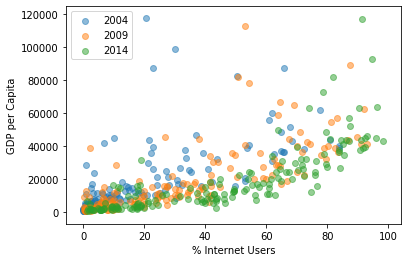

In [228]:
plt.scatter(gdp_int_04.Internet_Users_Pct, gdp_int_04.GDP_Per_Capita, label = '2004',alpha = .5)
plt.scatter(gdp_int_09.Internet_Users_Pct, gdp_int_09.GDP_Per_Capita, label = '2009', alpha = .5)
plt.scatter(gdp_int_14.Internet_Users_Pct, gdp_int_14.GDP_Per_Capita, label = '2014', alpha = .5)
plt.legend()
plt.xlabel('% Internet Users')
plt.ylabel('GDP per Capita')

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

- positive correlation, especially in the later years.  
- appears that the higher GDP countries shift towards higher intern % users over time. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal? 

yes, seems unimodal

(array([47., 30., 17., 18., 18., 21., 10.,  9.,  6., 10.,  6.,  4.,  5.,
         4.,  6.,  4.,  7.,  2.,  2.,  2.,  1.,  2.,  0.,  2.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([   672.68164828,   3268.01014879,   5863.3386493 ,   8458.66714981,
         11053.99565032,  13649.32415084,  16244.65265135,  18839.98115186,
         21435.30965237,  24030.63815289,  26625.9666534 ,  29221.29515391,
         31816.62365442,  34411.95215494,  37007.28065545,  39602.60915596,
         42197.93765647,  44793.26615699,  47388.5946575 ,  49983.92315801,
         52579.25165852,  55174.58015904,  57769.90865955,  60365.23716006,
         62960.56566057,  65555.89416109,  68151.2226616 ,  70746.55116211,
         73341.87966262,  75937.20816314,  78532.53666365,  81127.86516416,
         83723.19366467,  86318.52216519,  88913.8506657 ,  91509.17916621,
         94104.50766672,  96699.

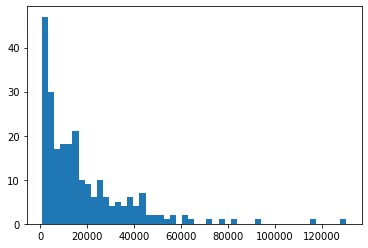

In [257]:
plt.hist(gdp_int_14.GDP_Per_Capita, bins = 50)

26. Look at the distribution of Internet Use for 2014. Is it unimodal?  
No, it is not unimodal


(array([ 7.,  7.,  6.,  5.,  6.,  7.,  2.,  6.,  6., 10.,  3.,  2.,  2.,
         3.,  2.,  3.,  1.,  2.,  0.,  4.,  7.,  5.,  6.,  3.,  3.,  7.,
         1.,  5.,  3.,  2.,  4.,  4.,  6.,  4.,  3.,  7.,  4.,  3.,  4.,
         2.,  5.,  2.,  4.,  4.,  3.,  0.,  5.,  4.,  5.,  3.]),
 array([ 0.    ,  1.9632,  3.9264,  5.8896,  7.8528,  9.816 , 11.7792,
        13.7424, 15.7056, 17.6688, 19.632 , 21.5952, 23.5584, 25.5216,
        27.4848, 29.448 , 31.4112, 33.3744, 35.3376, 37.3008, 39.264 ,
        41.2272, 43.1904, 45.1536, 47.1168, 49.08  , 51.0432, 53.0064,
        54.9696, 56.9328, 58.896 , 60.8592, 62.8224, 64.7856, 66.7488,
        68.712 , 70.6752, 72.6384, 74.6016, 76.5648, 78.528 , 80.4912,
        82.4544, 84.4176, 86.3808, 88.344 , 90.3072, 92.2704, 94.2336,
        96.1968, 98.16  ]),
 <a list of 50 Patch objects>)

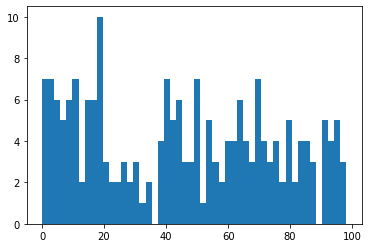

In [258]:
plt.hist(gdp_int_14.Internet_Users_Pct, bins = 50)

27. What are the top 5 countries in terms of internet use in 2014?

From question 18:

Country  Year  GDP_Per_Capita  Internet_Users_Pct  
2581              Iceland  2014    42774.888849               98.16  
6772              Bermuda  2014             NaN               96.80  
4530               Norway  2014    63328.259526               96.30  
1404              Denmark  2014    45057.083449               95.99  
6732              Andorra  2014             NaN               95.90  

28. Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.


Originally interpreted this wrong, and created a dataframe that has the top 5 countries in each year (not all the data for the top countries from 2014).  Saving this as markdown to not lose the code. 

used these steps found online: https://cmdlinetips.com/2019/03/how-to-get-top-n-rows-with-in-each-group-in-pandas/

temp1 = subset_04_09_14.groupby(['Year']).apply(lambda x: x.sort_values(['Internet_Users_Pct'], ascending = False)).reset_index(drop=True)

top_5_internet = temp1.groupby('Year').head(5).reset_index(drop=True)

top_5_internet

In [231]:
top_5_internet = subset_04_09_14[subset_04_09_14.Country.isin(gdp_int_14.sort_values('Internet_Users_Pct', ascending = False).Country.head(5))]
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
542,Bermuda,2009,57151.919132,83.250000
547,Bermuda,2004,55452.638880,60.990867
1404,Denmark,2014,45057.083449,95.990000
1409,Denmark,2009,43382.615688,86.840000
1414,Denmark,2004,43670.446201,80.930000
2581,Iceland,2014,42774.888849,98.160000
2586,Iceland,2009,41505.084834,93.000000
2591,Iceland,2004,38893.378798,83.880000
4530,Norway,2014,63328.259526,96.300000
4535,Norway,2009,62617.153609,92.080000


29. Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

lines come out in correctly since the year comes out of order.  Ordering by year to fix.(comment out first line in below cell to see the error. 

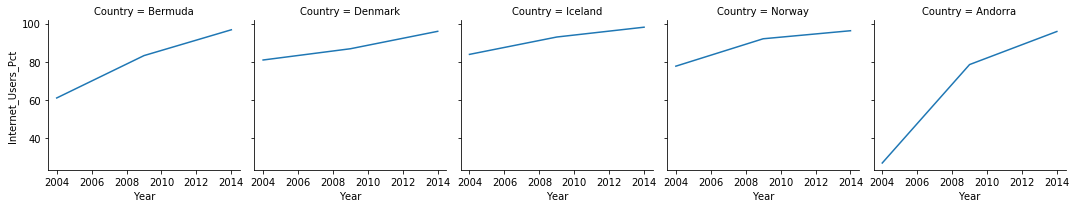

In [243]:
top_5_internet = top_5_internet.sort_values('Year')
g = sns.FacetGrid(top_5_internet, col = 'Country')
g = g.map(plt.plot, 'Year','Internet_Users_Pct')

30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?  

Dem. People's Rep. of Korea is consistently the lowest, at 0%

In [248]:
#same code as Q28, but ordered in ascending. 
bottom_5_internet = subset_04_09_14[subset_04_09_14.Country.isin(gdp_int_14.sort_values('Internet_Users_Pct').Country.head(5))]
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1722,Eritrea,2009,1950.533339,0.540000
1727,Eritrea,2004,2317.349879,NaN
6044,Timor-Leste,2014,6466.737732,1.140000
6049,Timor-Leste,2009,9275.529371,0.185252
6054,Timor-Leste,2004,4898.575839,NaN
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000


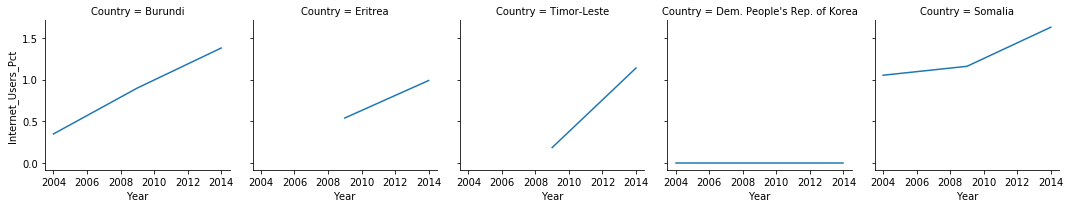

In [249]:
bottom_5_internet = bottom_5_internet.sort_values('Year')
g = sns.FacetGrid(bottom_5_internet, col = 'Country')
g = g.map(plt.plot, 'Year','Internet_Users_Pct')

31. Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.

In [252]:
#subset the data and create dataframe
top_5_gdp = subset_04_09_14[subset_04_09_14.Country.isin(gdp_int_14.sort_values('GDP_Per_Capita', ascending = False).Country.head(5))]
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
707,Brunei,2014,76448.593329,NaN
712,Brunei,2009,79485.001581,NaN
717,Brunei,2004,83963.238066,NaN
3610,Luxembourg,2014,92349.186429,94.670000
3615,Luxembourg,2009,89098.734264,87.310000
3620,Luxembourg,2004,87209.819367,65.880000
3639,"Macao SAR, China",2014,130439.106674,NaN
3644,"Macao SAR, China",2009,79955.986107,NaN
3649,"Macao SAR, China",2004,60791.976853,NaN
5003,Qatar,2014,116693.507701,91.490000


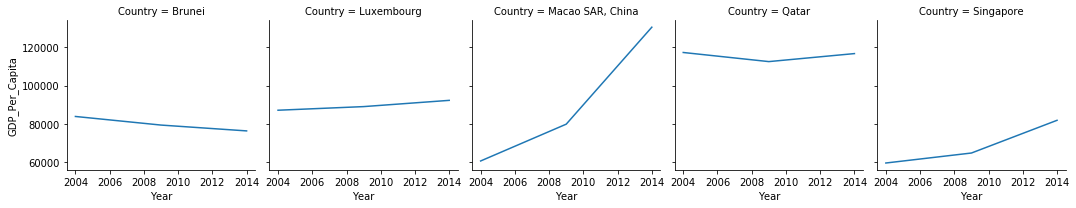

In [253]:
top_5_gdp = top_5_gdp.sort_values('Year')
g = sns.FacetGrid(top_5_gdp, col = 'Country')
g = g.map(plt.plot, 'Year','GDP_Per_Capita')

32. Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.

In [254]:
bottom_5_gdp = subset_04_09_14[subset_04_09_14.Country.isin(gdp_int_14.sort_values('GDP_Per_Capita').Country.head(5))]
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1014,Central African Republic,2014,672.681648,NaN
1019,Central African Republic,2009,949.551325,NaN
1024,Central African Republic,2004,848.689032,NaN
1375,Dem. Rep. Congo,2014,784.872656,NaN
1380,Dem. Rep. Congo,2009,636.875743,NaN
1385,Dem. Rep. Congo,2004,577.483297,NaN
3697,Malawi,2014,1142.530804,5.830000


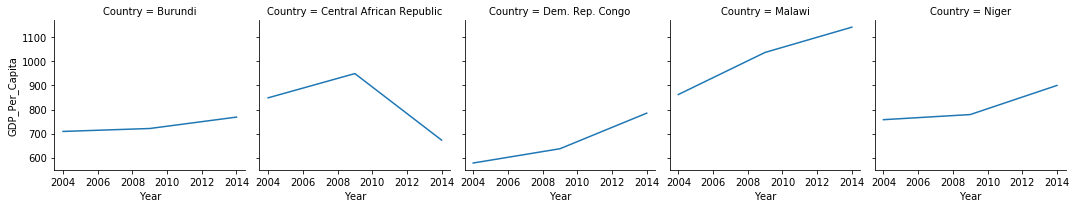

In [255]:
bottom_5_gdp = bottom_5_gdp.sort_values('Year')
g = sns.FacetGrid(bottom_5_gdp, col = 'Country')
g = g.map(plt.plot, 'Year','GDP_Per_Capita')

33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Central African Republic (CAR) went down over time. In 2013, CAR had a civil war.  This was particularly hard for the economy. 